###Compréhension des données


In [ ]:
import pandas as pd
import os
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# Download latest version
path = kagglehub.dataset_download("mrsimple07/salary-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 16.2k/16.2k [00:00<00:00, 11.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/salary-prediction-data/versions/1


In [ ]:
# Affiche le chemin du dossier
print("Path to dataset files:", path)

# Lister les fichiers dans le dossier
files = os.listdir(path)
print("Fichiers disponibles:", files)

# Charger le fichier CSV principal
csv_file = [f for f in files if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

print("Premiére dataset")
print("Taille de la data 1:", df.shape)
print(df.info())
print("Premiére dataset")
print(df.head())


Path to dataset files: /root/.cache/kagglehub/datasets/mrsimple07/salary-prediction-data/versions/1
Fichiers disponibles: ['salary_prediction_data.csv']
Premiére dataset
Taille de la data 1: (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB
None
Premiére dataset
     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor 

In [ ]:
# Charger la 2e dataset
path2 = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")
print("Path to second dataset files:", path2)

# Liste les fichiers CSV dans le dossier
files2 = os.listdir(path2)
csv_file2 = [f for f in files2 if f.endswith('.csv')][0]

# Charger la seconde dataset
df2 = pd.read_csv(os.path.join(path2, csv_file2))
print("Deuxième dataset :")
print("Taille de la data2:", df2.shape)
print(df2.info())
print("Deuxième dataset :")
print(df2.head())

Path to second dataset files: /kaggle/input/salaly-prediction-for-beginer
Deuxième dataset :
Taille de la data2: (375, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
Deuxième dataset :
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0 

###Préparation des données


In [ ]:
df.drop(columns=["Location"], inplace=True)

In [ ]:
print("Première data après suppression")
print(df.head())

Première data après suppression
     Education  Experience Job_Title  Age  Gender         Salary
0  High School           8   Manager   63    Male   84620.053665
1          PhD          11  Director   59    Male  142591.255894
2     Bachelor          28   Manager   61  Female   97800.255404
3  High School          29  Director   45    Male   96834.671282
4          PhD          25   Analyst   26  Female  132157.786175


In [ ]:
df.columns = df.columns.str.strip()
df.rename(columns={
    "Experience": "Years of Experience",
    "Job_Title": "Job Title",
    "Education": "Education Level"
}, inplace=True)

df2.columns = df2.columns.str.strip()

df1 = df[["Education Level", "Years of Experience", "Job Title", "Age", "Gender", "Salary"]]
df2 = df2[["Education Level", "Years of Experience", "Job Title", "Age", "Gender", "Salary"]]

df_combined = pd.concat([df, df2], ignore_index=True)

print("Taille finale du dataset fusionné :", df_combined.shape)
print(df_combined.head())


Taille finale du dataset fusionné : (1375, 6)
  Education Level  Years of Experience Job Title   Age  Gender         Salary
0     High School                  8.0   Manager  63.0    Male   84620.053665
1             PhD                 11.0  Director  59.0    Male  142591.255894
2        Bachelor                 28.0   Manager  61.0  Female   97800.255404
3     High School                 29.0  Director  45.0    Male   96834.671282
4             PhD                 25.0   Analyst  26.0  Female  132157.786175


In [ ]:
print("Valeurs manquantes ")
print(df_combined.isnull().sum())

Valeurs manquantes 
Education Level        2
Years of Experience    2
Job Title              2
Age                    2
Gender                 2
Salary                 2
dtype: int64


In [ ]:
print("Lignes avec valeurs manquantes :")
print(df_combined[df_combined.isnull().any(axis=1)])


Lignes avec valeurs manquantes :
     Education Level  Years of Experience Job Title  Age Gender  Salary
1172             NaN                  NaN       NaN  NaN    NaN     NaN
1260             NaN                  NaN       NaN  NaN    NaN     NaN


In [ ]:
df_combined.dropna(how='all', inplace=True)

print("Valeurs manquantes restantes ")
print(df_combined.isnull().sum())

print("Taille après suppression :", df_combined.shape)


Valeurs manquantes restantes 
Education Level        0
Years of Experience    0
Job Title              0
Age                    0
Gender                 0
Salary                 0
dtype: int64
Taille après suppression : (1373, 6)


In [ ]:
df_combined['Salary'].describe()

,Salary
count,1373.000000
mean,104205.210662
std,34889.236873
min,350.000000
25%,80000.000000
50%,102744.169953
75%,128295.224422
max,250000.000000


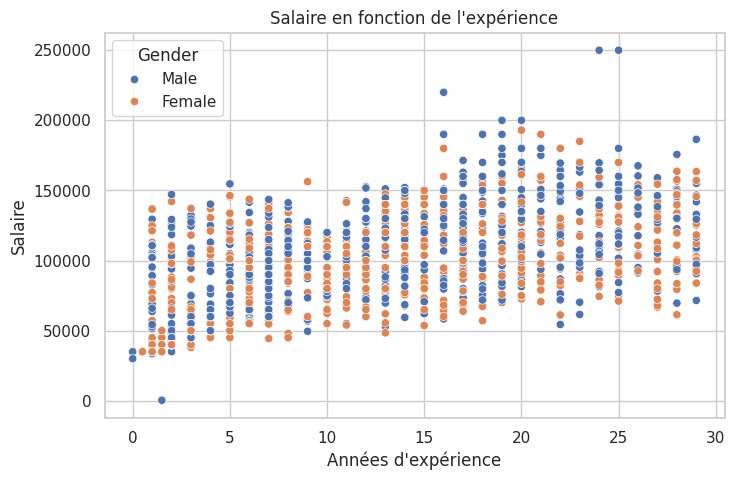

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_combined, x='Years of Experience', y='Salary', hue='Gender')
plt.title("Salaire en fonction de l'expérience")
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.show()


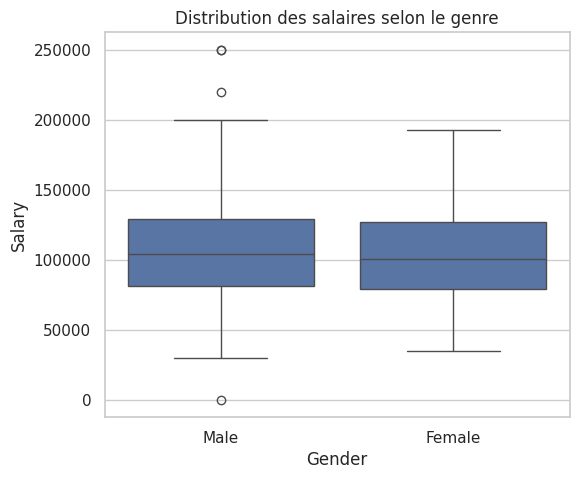

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_combined, x='Gender', y='Salary')
plt.title("Distribution des salaires selon le genre")
plt.show()


In [ ]:
# Calcul des quartiles et de l'IQR
Q1 = df_combined['Salary'].quantile(0.25)
Q3 = df_combined['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers
outliers = df_combined[(df_combined['Salary'] < (Q1 - 1.5 * IQR)) | (df_combined['Salary'] > (Q3 + 1.5 * IQR))]

# Affichage des outliers
print("Nombre d'outliers :", outliers.shape[0])
print(outliers)


Nombre d'outliers : 4
     Education Level  Years of Experience                           Job Title  \
1030      Bachelor's                 25.0                                 CEO   
1083             PhD                 24.0            Chief Technology Officer   
1105             PhD                 16.0                  Chief Data Officer   
1259      Bachelor's                  1.5  Junior Business Operations Analyst   

       Age Gender    Salary  
1030  50.0   Male  250000.0  
1083  52.0   Male  250000.0  
1105  44.0   Male  220000.0  
1259  29.0   Male     350.0  


In [ ]:
df_combined = df_combined.drop(index=1259)

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372 entries, 0 to 1374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education Level      1372 non-null   object 
 1   Years of Experience  1372 non-null   float64
 2   Job Title            1372 non-null   object 
 3   Age                  1372 non-null   float64
 4   Gender               1372 non-null   object 
 5   Salary               1372 non-null   float64
dtypes: float64(3), object(3)
memory usage: 75.0+ KB


In [ ]:
df_combined['Education Level'] = df_combined['Education Level'].replace({
    'Bachelor': "Bachelor's",
    'Master': "Master's"
})

In [ ]:
df_combined['Education Level'].unique()

array(['High School', 'PhD', "Bachelor's", "Master's"], dtype=object)

In [ ]:
df_combined['Job Title'].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer', 'Software Engineer',
       'Data Analyst', 'Senior Manager', 'Sales Associate',
       'Marketing Analyst', 'Product Manager', 'Sales Manager',
       'Marketing Coordinator', 'Senior Scientist', 'Software Developer',
       'HR Manager', 'Financial Analyst', 'Project Manager',
       'Customer Service Rep', 'Operations Manager', 'Marketing Manager',
       'Senior Engineer', 'Data Entry Clerk', 'Sales Director',
       'Business Analyst', 'VP of Operations', 'IT Support', 'Recruiter',
       'Financial Manager', 'Social Media Specialist', 'Software Manager',
       'Junior Developer', 'Senior Consultant', 'Product Designer', 'CEO',
       'Accountant', 'Data Scientist', 'Marketing Specialist',
       'Technical Writer', 'HR Generalist', 'Project Engineer',
       'Customer Success Rep', 'Sales Executive', 'UX Designer',
       'Operations Director', 'Network Engineer',
       'Administrative Assistant', 'Strategy Consultant', 'Copy

In [ ]:
df_combined['Gender'].unique()

array(['Male', 'Female'], dtype=object)

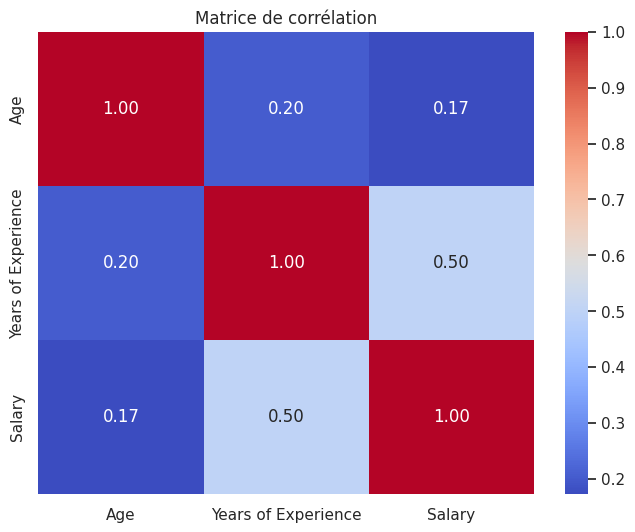

In [ ]:
# Sélection des colonnes numériques
num_cols = ['Age', 'Years of Experience', 'Salary']
df_corr = df_combined[num_cols]

# Matrice de corrélation
corr_matrix = df_corr.corr()

# Affichage avec heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
# Copie du dataframe
df_clean = df_combined.copy()

X = df_clean.drop("Salary", axis=1)
y = df_clean["Salary"].values.reshape(-1, 1)

# Colonnes
num_cols = ["Age", "Years of Experience"]
cat_onehot = ["Gender", "Job Title"]
cat_ordinal = ["Education Level"]

# Ordre logique pour Education
education_order = [['High School', "Bachelor's", "Master's", 'PhD']]

# Encodage
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("edu", OrdinalEncoder(categories=education_order), cat_ordinal),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_onehot)
])

# Transformation
X_processed = preprocessor.fit_transform(X)

# Normalisation cible
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_scaled, test_size=0.2, random_state=42
)

###Modélisation

In [ ]:
# Architecture du réseau
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1

# Initialisation des poids
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# Fonctions d'activation
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
# Entraînement
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2

    loss = mse_loss(y_train, y_pred)

    # Rétropropagation
    dZ2 = 2 * (y_pred - y_train) / y_train.shape[0]
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Mise à jour des poids
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.0044
Epoch 100, Loss: 0.9622
Epoch 200, Loss: 0.6388
Epoch 300, Loss: 0.3645
Epoch 400, Loss: 0.2832
Epoch 500, Loss: 0.2609
Epoch 600, Loss: 0.2510
Epoch 700, Loss: 0.2445
Epoch 800, Loss: 0.2394
Epoch 900, Loss: 0.2350


###Evaluation

In [ ]:
# Évaluation sur le test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
y_pred_test = Z2_test

# Inversion de la normalisation de la cible
y_pred_test_orig = scaler_y.inverse_transform(y_pred_test)
y_test_orig = scaler_y.inverse_transform(y_test)

# Métriques de performance
rmse = mean_squared_error(y_test_orig, y_pred_test_orig) ** 0.5
r2 = r2_score(y_test_orig, y_pred_test_orig)

print("Évaluation du modèle")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

Évaluation du modèle
RMSE : 16827.41
R² : 0.76


###Sauvegarde

In [ ]:
# Poids et biais du réseau
joblib.dump(W1, 'W1_model.pkl')
joblib.dump(b1, 'b1_model.pkl')
joblib.dump(W2, 'W2_model.pkl')
joblib.dump(b2, 'b2_model.pkl')

# Préprocesseur complet
joblib.dump(preprocessor, 'preprocessor.pkl')

# Scaler pour la cible
joblib.dump(scaler_y, 'scaler_y.pkl')


['scaler_y.pkl']

###Test

In [ ]:
import pandas as pd
import numpy as np
import joblib

# Chargement des poids et des objets sauvegardés
W1 = joblib.load('W1_model.pkl')
b1 = joblib.load('b1_model.pkl')
W2 = joblib.load('W2_model.pkl')
b2 = joblib.load('b2_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Fonctions d'activation
def relu(Z):
    return np.maximum(0, Z)

# Nouvelle donnée
new_data_example = pd.DataFrame({
    'Age': [30],
    'Gender': ['Female'],
    'Education Level': ['Master\'s'],
    'Job Title': ['Data Scientist'],
    'Years of Experience': [5]
})

# Prétraitement avec le pipeline complet
new_data_processed = preprocessor.transform(new_data_example)

# Prédiction (forward pass)
Z1_new = np.dot(new_data_processed, W1) + b1
A1_new = relu(Z1_new)
Z2_new = np.dot(A1_new, W2) + b2
y_pred_new = Z2_new

# Re-normalisation de la prédiction
y_pred_new_orig = scaler_y.inverse_transform(y_pred_new)

# Conversion en dinars tunisiens
usd_to_tnd = 3.1
salaire_usd = y_pred_new_orig[0][0]
salaire_tnd = salaire_usd * usd_to_tnd

# Affichage du résultat
print(f"Salaire prédit : ${salaire_usd:.2f} USD")
print(f"🇹🇳 Salaire prédit en dinars tunisiens : {salaire_tnd:.2f} TND")


Salaire prédit : $93143.45 USD
🇹🇳 Salaire prédit en dinars tunisiens : 288744.69 TND
